<h1>Fashion-MNIST Classification (PyTorch) </h1>

In [68]:
# PyTorch and other Modules

import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import confusion_matrix
from PIL import Image

import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

torch.manual_seed(0)

In [17]:
#Hint:

IMAGE_SIZE = 28

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [4]:
dataset_train=dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
dataset_val=dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed, download=True)

In [18]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [19]:
a = next(iter(train_loader))
a[0].size()
len(dataset_train)

60000

9


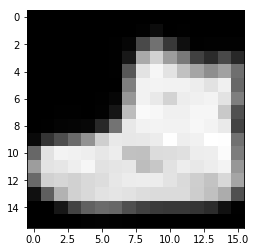

In [20]:
image, label = next(iter(dataset_train))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 16, 16]) torch.Size([10])
labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

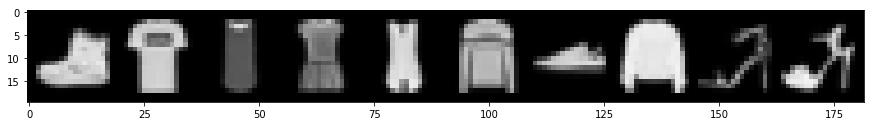

In [26]:
demo_loader = torch.utils.data.DataLoader(dataset_train, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")

In [48]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=32, out_2=64,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network

train loader  and validation loader 

In [28]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

Convolutional Neural Network object 

In [49]:
# model = CNN(out_1=16, out_2=32,number_of_classes=10)
model =CNN_batch(out_1=32, out_2=64,number_of_classes=10)

Code used to train the model 

In [78]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
loss_list=[]
predictions_list=[]
labels_list=[]

N_test=len(dataset_val)
learning_rate =0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        labels_list.append(y_test)
        predictions_list.append(yhat)
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    loss_list.append(loss.data)
    cost_list.append(cost)
    print("Epoch: {}, Loss: {}, Accuracy: {}%".format(epoch, loss.data, accuracy))
    
print(model)

Epoch: 0, Loss: 0.017227184027433395, Accuracy: 0.8998%
Epoch: 1, Loss: 0.026706848293542862, Accuracy: 0.9017%
Epoch: 2, Loss: 0.03409283235669136, Accuracy: 0.9026%
Epoch: 3, Loss: 0.03769439086318016, Accuracy: 0.9038%
Epoch: 4, Loss: 0.039492662996053696, Accuracy: 0.9047%
CNN_batch(
  (cnn1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=10, bias=True)
  (bn_fc1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


You will use the following to plot the Cost and accuracy for each epoch for the training and testing data, respectively. 

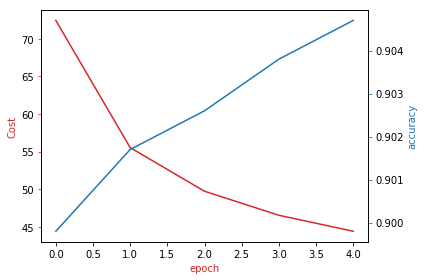

In [79]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [80]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))
# print(labels_l.shape)

import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      5000
           1       0.99      0.98      0.99      5000
           2       0.84      0.83      0.83      5000
           3       0.89      0.91      0.90      5000
           4       0.83      0.84      0.83      5000
           5       0.98      0.97      0.98      5000
           6       0.76      0.72      0.74      5000
           7       0.95      0.97      0.96      5000
           8       0.98      0.98      0.98      5000
           9       0.97      0.96      0.96      5000

    accuracy                           0.90     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.90      0.90      0.90     50000




In [102]:
labels = model(x)
print(labels)
label = [np.argmax(i) for i in labels]
# class_label = [inverse_map[x] for x in label]
# print(class_label[:3])
# submission = pd.DataFrame({ 'Image': test.Image, 'Class': class_label })
# submission.head(10)
# submission.to_csv('submission.csv', index=False)

tensor([[ 1.5117e+01, -4.7002e+00,  3.9541e+00, -4.2363e+00, -5.5402e+00,
         -2.2260e+00,  5.2197e-01, -9.8186e+00, -5.2352e+00, -1.7464e+00],
        [ 1.6063e+00,  1.0824e+01,  6.8543e-01, -2.3809e+00, -1.8499e+00,
          1.1234e+00, -1.6657e+00,  1.4930e+00,  3.0546e-01, -1.8466e+00],
        [ 3.8038e-01,  4.3610e+00, -1.5054e+00,  6.0016e+00, -5.3693e+00,
         -2.1611e+00,  7.8251e-01,  5.6012e-01, -3.7720e+00, -3.8370e+00],
        [-8.8263e+00,  1.9502e+00,  1.8623e+00,  2.8656e+00, -7.2012e+00,
          1.6978e+01,  4.8063e+00,  1.0468e+00, -3.2556e+00, -1.9658e-01],
        [ 5.4061e+00, -1.0212e+00, -2.9814e+00, -4.7779e+00, -3.1683e+00,
         -4.5984e+00,  5.7984e+00, -2.7345e+00, -1.3813e+00, -4.2874e+00],
        [ 8.3717e+00, -2.6422e+00,  2.5705e+00, -5.4840e+00, -7.2923e+00,
         -5.7971e+00,  2.1482e+00, -3.1940e+00, -1.9469e+00, -3.2704e+00],
        [ 9.8195e+00, -8.0906e-01, -2.6842e+00,  2.5854e+00, -3.9755e+00,
          2.6658e+00,  7.9979e+0

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([3, 1, 16, 16]) torch.Size([3])
labels:  Ankle Boot, Pullover, Trouser, 

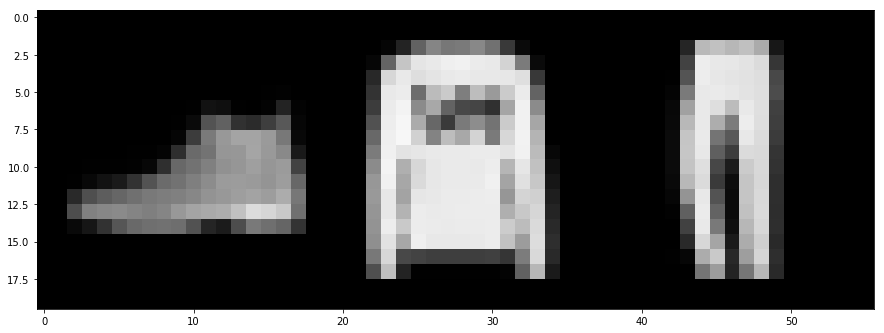

In [111]:
demo_loader = torch.utils.data.DataLoader(dataset_val, batch_size=3)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")